In [7]:
from PIL import Image
from glob import glob
import re
import os

def combine_images(columns, space, images):
    rows = len(images) // columns
    if len(images) % columns:
        rows += 1
    width_max = max([Image.open(image).width for image in images])
    height_max = max([Image.open(image).height for image in images])
    background_width = width_max*columns + (space*columns)-space
    background_height = height_max*rows + (space*rows)-space
    background = Image.new('RGBA', (background_width, background_height), (255, 255, 255, 255))
    x = 0
    y = 0
    for i, image in enumerate(images):
        img = Image.open(image)
        x_offset = int((width_max-img.width)/2)
        y_offset = int((height_max-img.height)/2)
        background.paste(img, (x+x_offset, y+y_offset))
        x += width_max + space
        if (i+1) % columns == 0:
            y += height_max + space
            x = 0
    return background

combined = combine_images(
    2, 
    0, 
    ["figures/snr_3.0_detector_1_cluster_0_coadds.png", "figures/snr_3.0_detector_1_cluster_0_light_curve.png"]
)

In [18]:
import os

images = {}
for f in glob("figures/*.png"):
    b = os.path.basename(f)
    prefix = os.path.basename(f).replace("_coadds.png", "").replace("_light_curve.png", "")
    images[prefix] = images.get(prefix, {})
    if "_coadds" in b:
        images[prefix]['coadd'] = f
    elif '_light_curve' in b:
        images[prefix]['lc'] = f

os.makedirs("figures/combined", exist_ok=True)
for p in images:
    if 'coadd' in images[p] and 'lc' in images[p]:
        c = combine_images(1, 0, [images[p]['coadd'], images[p]['lc']])
        c.save(f"figures/combined/{p}.png")

In [24]:
from pathlib import Path
import re

In [124]:
images = {}
for f in Path("/epyc/projects/salad/search/new/DEEP/20190403/A0c/").rglob("summary_*.png"):
    b = f.name
    m = re.compile(".*/detector_(?P<detector>\d+)/.*").match(str(f))
    if m is None:
        print(f)
        continue
    d = m.groupdict()['detector']
    s = re.compile(".*/snr_(?P<snr>\d.\d)/.*").match(str(f)).groupdict()['snr']
    if '/tno/' in str(f):
        continue
    if s != '3.0':
        continue

    prefix = f"DEEP_20190403_A0c_detector_{d}_snr_{s}_{f.parent.name}"
    
    images[prefix] = images.get(prefix, {})
    if "coadds" in b:
        images[prefix]['coadd'] = str(f)
    elif 'lightcurve' in b:
        images[prefix]['lightcurve'] = str(f)
    elif "cutouts" in b:
        images[prefix]['cutouts'] = str(f)
#     b = f.name
#     prefix = b.replace("_coadds.png", "").replace("_light_curve.png", "")
#     images[prefix] = images.get(prefix, {})
#     if "_coadds" in b:
#         images[prefix]['coadd'] = f
#     elif '_light_curve' in b:
#         images[prefix]['lc'] = f

len(images)

1274

In [75]:
os.makedirs("figures/combined", exist_ok=True)
for p in images:
    if all([k in images[p] for k in ['coadd', 'lightcurve', 'cutouts']:
        c = combine_images(2, 0, [images[p]['coadd'], images[p]['lc'], images[p]['cutouts']])
        c.save(f"figures/combined/{p}.png")

In [91]:
cutouts = {}
for f in Path("/epyc/projects/salad/search/new/DEEP/20190403/A0c/").rglob("cutout_*.png"):
    b = f.name
    m = re.compile(".*/detector_(?P<detector>\d+)/.*").match(str(f))
    if m is None:
        print(f)
        continue
    d = m.groupdict()['detector']
    s = re.compile(".*/snr_(?P<snr>\d.\d)/.*").match(str(f)).groupdict()['snr']
    if '/tno/' in str(f):
        continue
    if s != '3.0':
        continue

    prefix = f"DEEP_20190403_A0c_detector_{d}_snr_{s}_{f.parent.name}"
    
    cutouts[prefix] = cutouts.get(prefix, [])
    cutouts[prefix].append(str(f))
len(cutouts)

835

In [90]:
list(cutouts.keys())

['DEEP_20190403_A0c_detector_1_snr_3.0_cluster_0',
 'DEEP_20190403_A0c_detector_1_snr_3.0_cluster_1',
 'DEEP_20190403_A0c_detector_1_snr_3.0_cluster_2',
 'DEEP_20190403_A0c_detector_1_snr_3.0_cluster_3',
 'DEEP_20190403_A0c_detector_1_snr_3.0_cluster_4',
 'DEEP_20190403_A0c_detector_1_snr_3.0_cluster_5',
 'DEEP_20190403_A0c_detector_3_snr_3.0_cluster_0',
 'DEEP_20190403_A0c_detector_3_snr_3.0_cluster_1',
 'DEEP_20190403_A0c_detector_3_snr_3.0_cluster_2',
 'DEEP_20190403_A0c_detector_3_snr_3.0_cluster_3',
 'DEEP_20190403_A0c_detector_3_snr_3.0_cluster_4',
 'DEEP_20190403_A0c_detector_3_snr_3.0_cluster_5',
 'DEEP_20190403_A0c_detector_4_snr_3.0_cluster_1',
 'DEEP_20190403_A0c_detector_4_snr_3.0_cluster_2',
 'DEEP_20190403_A0c_detector_4_snr_3.0_cluster_3',
 'DEEP_20190403_A0c_detector_4_snr_3.0_cluster_5',
 'DEEP_20190403_A0c_detector_4_snr_3.0_cluster_6',
 'DEEP_20190403_A0c_detector_4_snr_3.0_cluster_7',
 'DEEP_20190403_A0c_detector_5_snr_3.0_cluster_0',
 'DEEP_20190403_A0c_detector_5_

In [92]:
combine_images(
    10, 0, 
    sorted(
        cutouts['DEEP_20190403_A0c_detector_15_snr_3.0_cluster_7'], 
        key=lambda x : int(Path(x).name.split("_")[1].split(".png")[0])
    )
)


KeyError: 'DEEP_20190403_A0c_detector_15_snr_3.0_cluster_7'

In [119]:
def combine(image):
    coadd = Image.open(image['coadd'])
    lc = Image.open(image['lightcurve'])
    cutouts = Image.open(image['cutouts'])
    _coadd = coadd.resize((cutouts.width, int(coadd.height * (cutouts.width/coadd.width))))
    _lc = lc.resize((cutouts.width, int(lc.height * (lc.width/coadd.width))))
    background = Image.new(
        'RGB', 
        (cutouts.width*2, max((_lc.height + _coadd.height), cutouts.height)), 
        (255, 255, 255)
    )
    
    background.paste(_coadd, (0, 0))
    background.paste(_lc, (0, _coadd.height))
    background.paste(cutouts, (cutouts.width, 0))
    return background

In [135]:
images = {}
for f in Path("/epyc/projects/salad/search/new/DEEP/20190403/A0c/").rglob("summary_*.png"):
    b = f.name
    m = re.compile(".*/detector_(?P<detector>\d+)/.*").match(str(f))
    if m is None:
        print(f)
        continue
    d = m.groupdict()['detector']
    s = re.compile(".*/snr_(?P<snr>\d.\d)/.*").match(str(f)).groupdict()['snr']
    if '/tno/' in str(f):
        continue
    if s != '3.0':
        continue

    prefix = f"DEEP_20190403_A0c_detector_{d}_snr_{s}_{f.parent.name}"
    
    images[prefix] = images.get(prefix, {})
    if "coadds" in b:
        images[prefix]['coadd'] = str(f)
    elif 'lightcurve' in b:
        images[prefix]['lightcurve'] = str(f)
    elif "cutouts" in b:
        images[prefix]['cutouts'] = str(f)
#     b = f.name
#     prefix = b.replace("_coadds.png", "").replace("_light_curve.png", "")
#     images[prefix] = images.get(prefix, {})
#     if "_coadds" in b:
#         images[prefix]['coadd'] = f
#     elif '_light_curve' in b:
#         images[prefix]['lc'] = f

len(images)



1274

In [136]:
for p in images:
    try:
        combine(images[p]).save(f"figures/combined/{p}.jpg", quality=50)
    except:
        print(p)

2704

In [117]:
background.size

(4400, 2704)

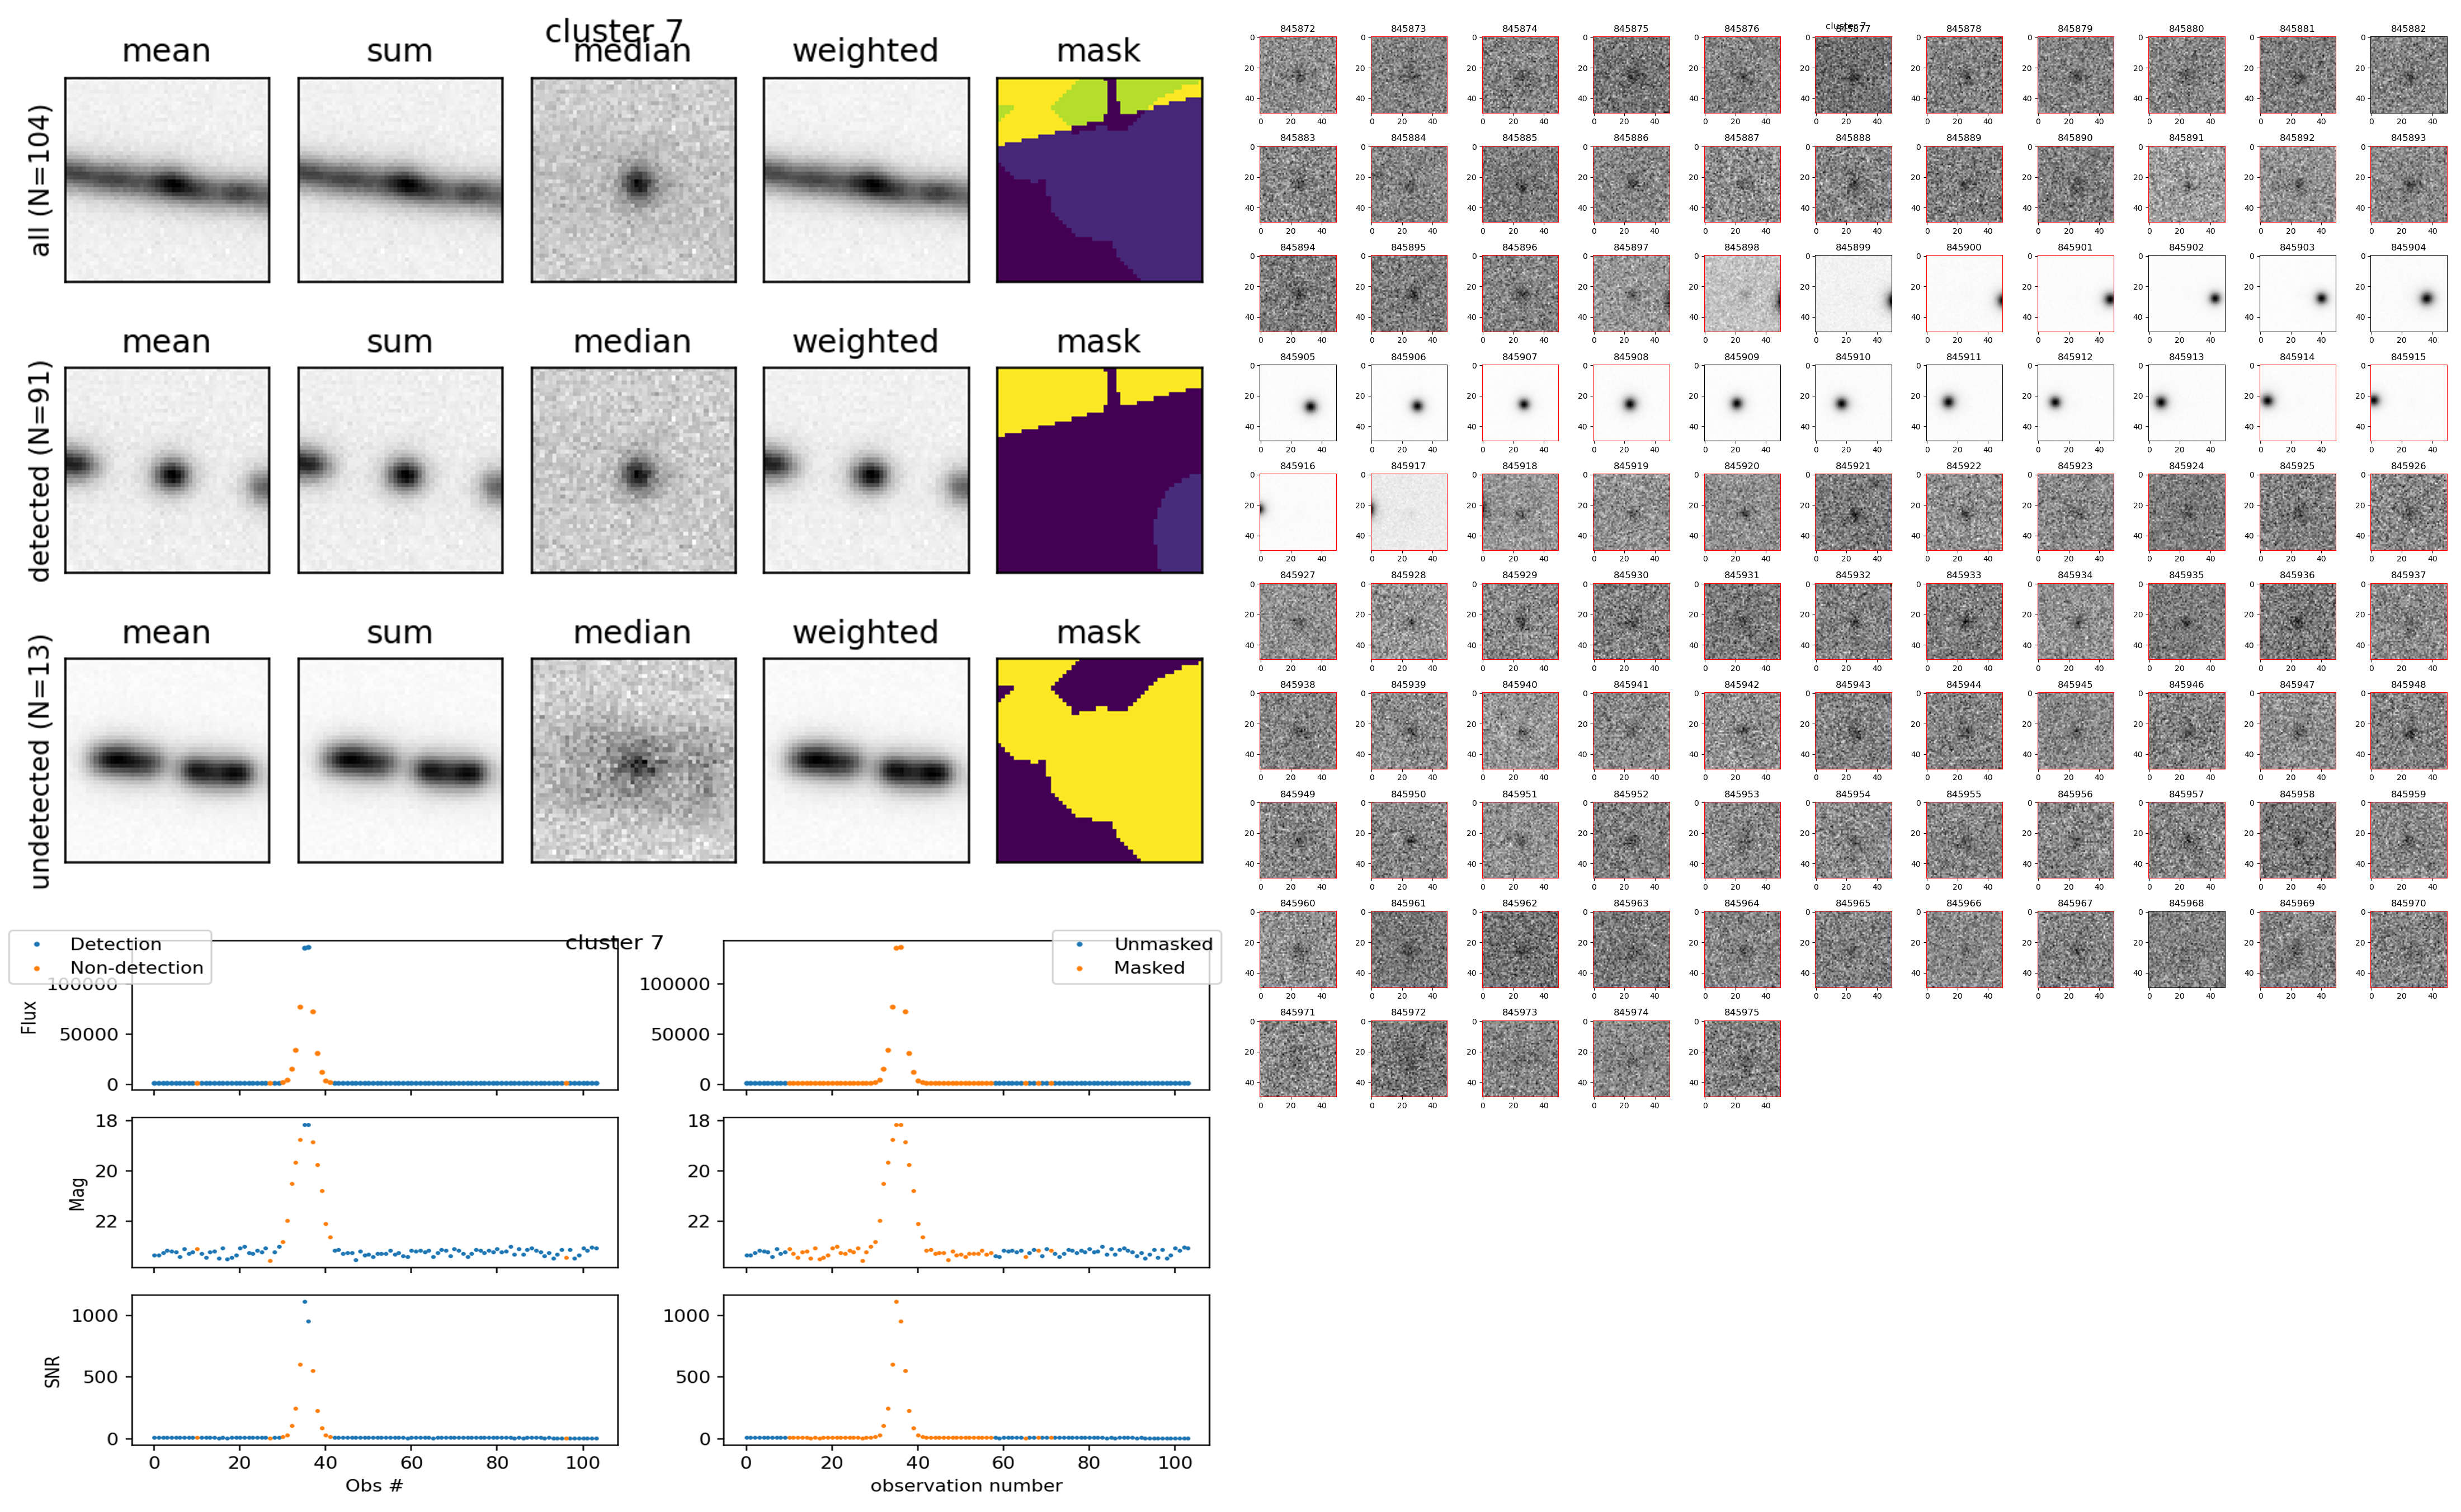

In [118]:
background.paste(_coadd, (0, 0))
background.paste(_lc, (0, _coadd.height))
background.paste(cutouts, (cutouts.width, 0))
background

In [ ]:
background = Image.new('RGBA', (, background_height), (255, 255, 255, 255))

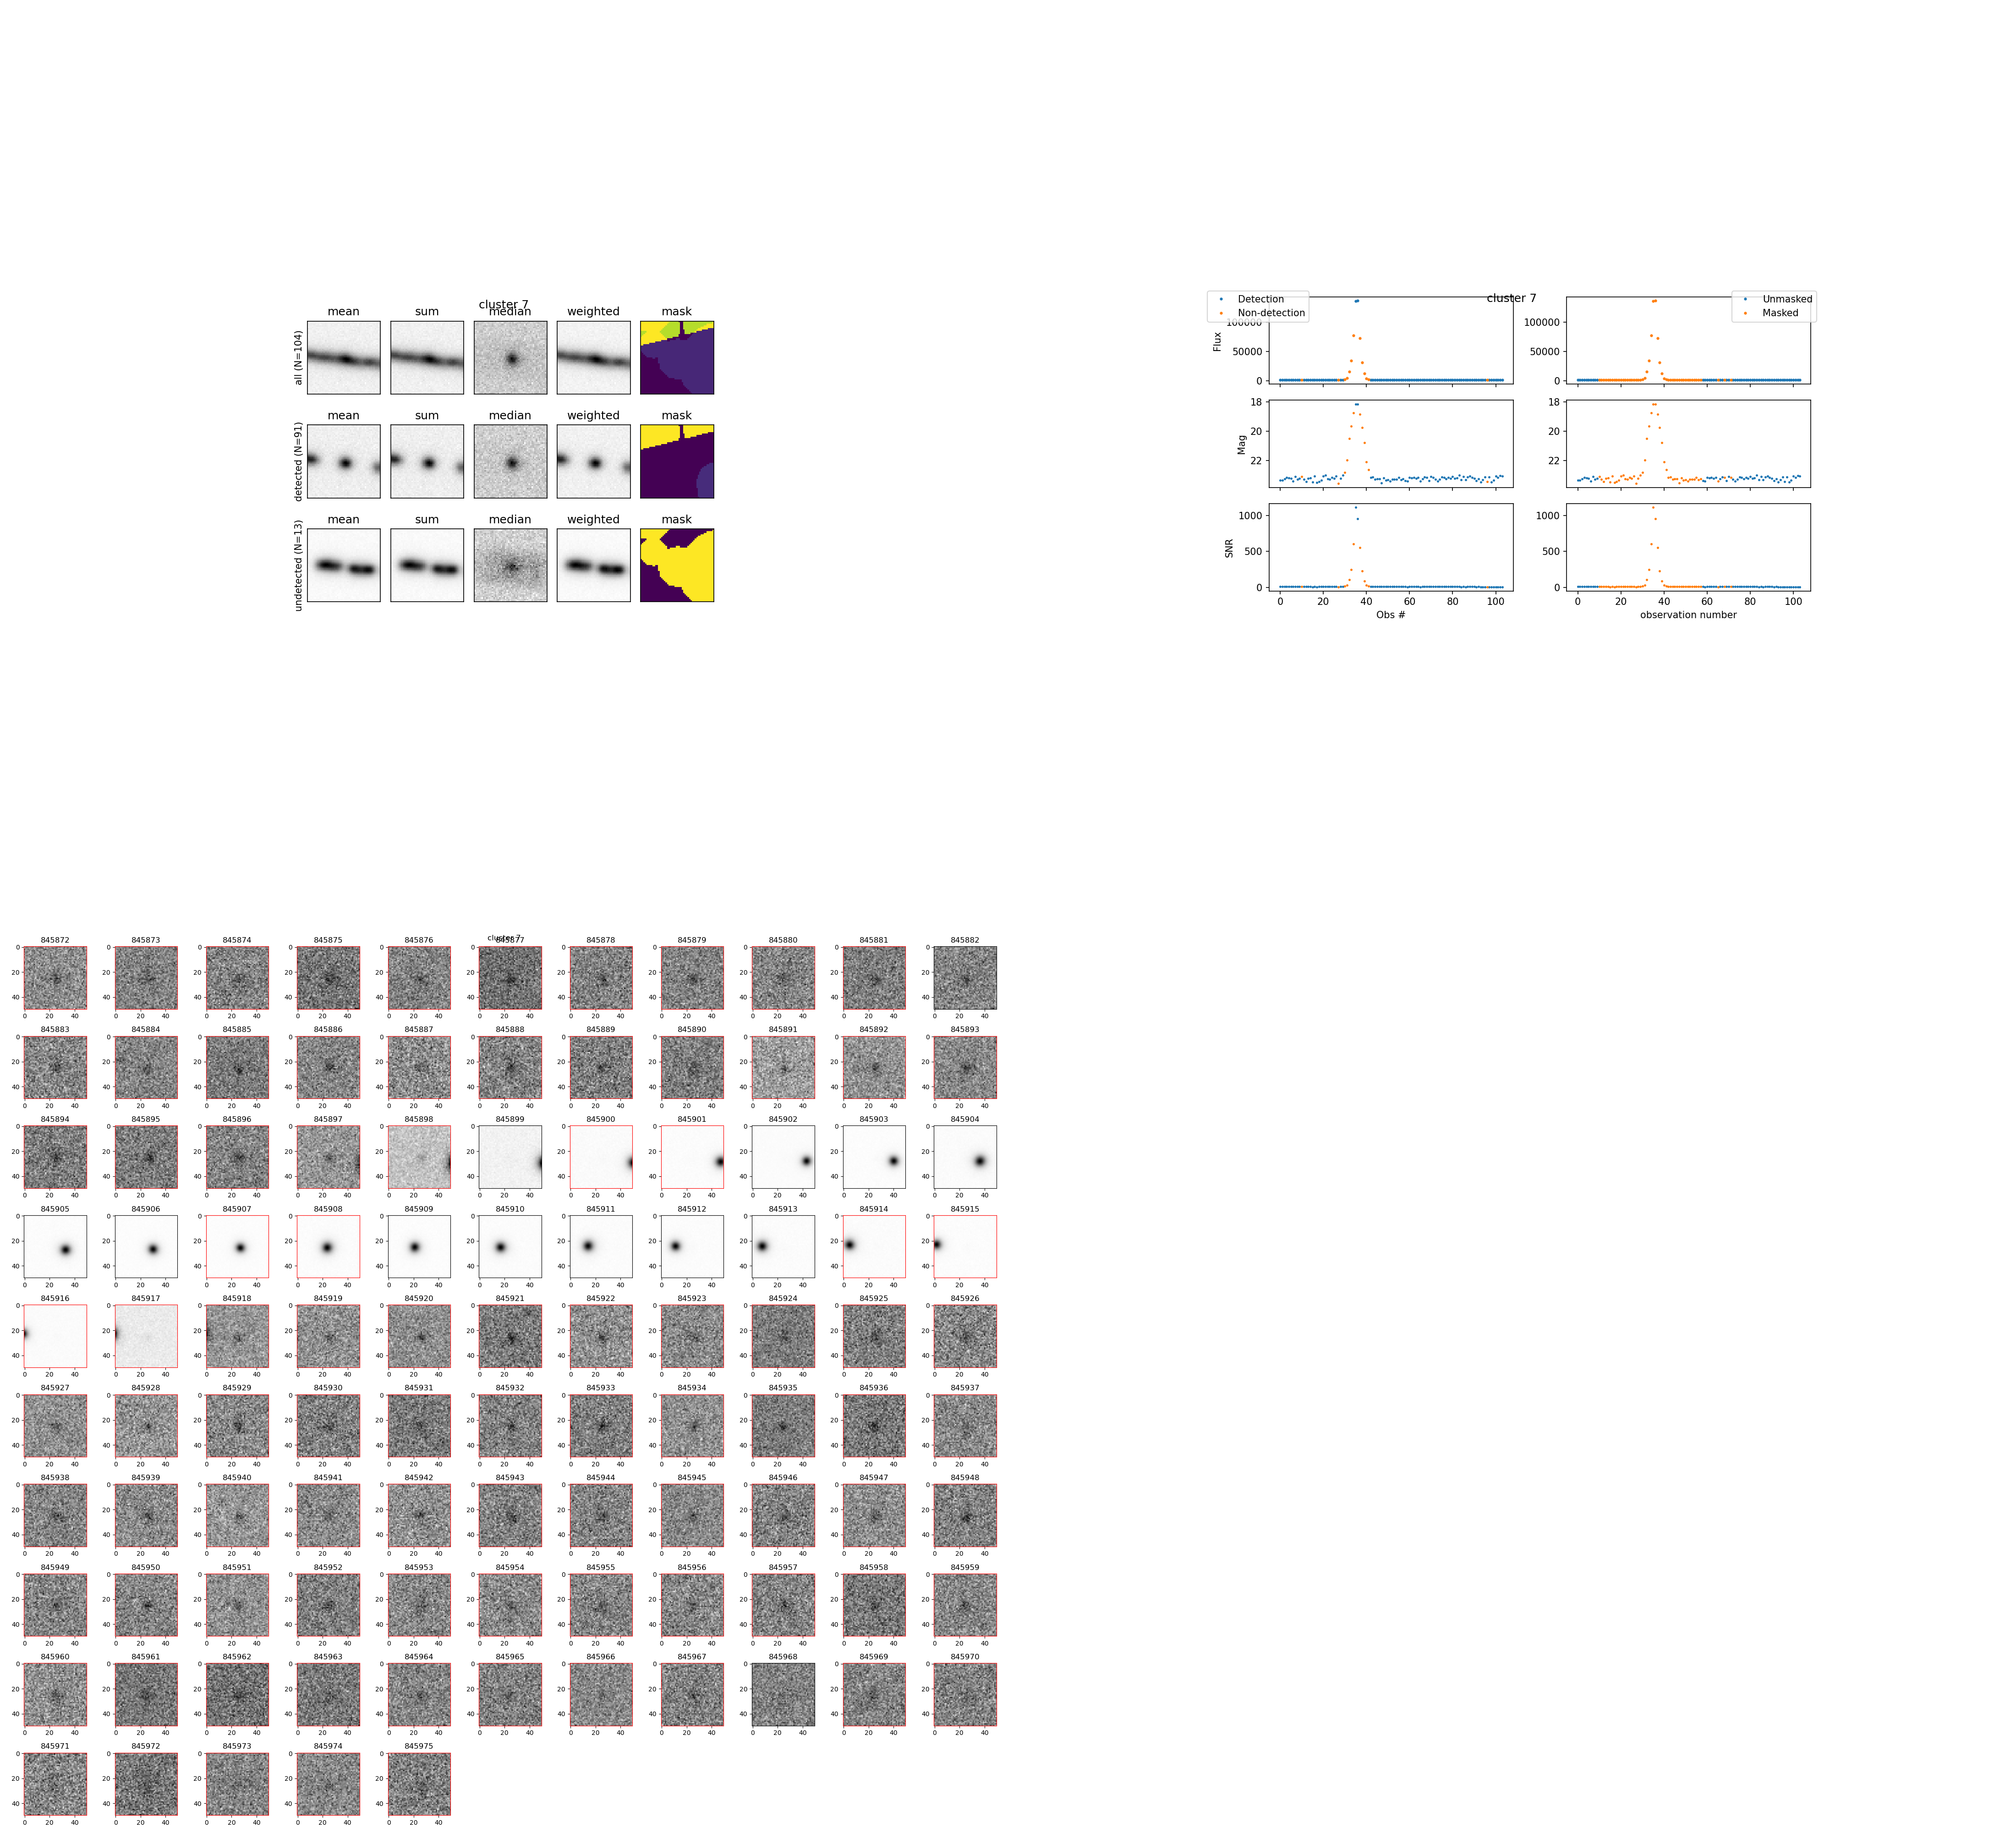

In [95]:
p = 'DEEP_20190403_A0c_detector_15_snr_3.0_cluster_7'
combine_images(2, 0, [images[p]['coadd'], images[p]['lightcurve'], images[p]['cutouts']])